In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np
from scipy.special import gamma
from scipy import signal
import time
try:
    from tqdm import tqdm_notebooks as tqdm
except ImportError:
    tqdm = lambda x: x
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
###

from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()
from tqdm import tqdm


import matplotlib as mpl
from matplotlib import cm

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

from shogun import *
from scipy.stats import norm, laplace
import random
import hypothesisTesting.shogunMMDutils as mmdutils

# import stylised_facts_data_utilities.createLOB as createLOB
import stylised_facts_data_utilities.gpyNARX as gpyNARX
import stylised_facts_data_utilities.longtaildistr as longtail
%matplotlib inline

plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [2]:
def shogun_features(x, y):
    # create shogun features
    return [RealFeatures(x.reshape(1, len(x))), RealFeatures(y.reshape(1, len(y)))]

In [3]:
# import numerical libraries

from scipy import stats
# import tableone
try:
    from tableone import TableOne
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne

### Assumptions and Investigations

1/ By moving to the tick domain, the need to force each trade into a time slot is removed as one does
not need to force the trades into predetermined sampling points as in calendar time. Additionally, when using calendar time sampling

2/ can we recover normality in each of the assets and periods?

3/duration between trades is
also added to the subordination framework to account for
the speed with which market participants act in physical
time.

4/we bring qualitative empirical evidence that the impact of a single
trade depends on the intertrade time lags. We find that when the trading rate be- comes faster, the return variance per trade strongly increases and that this behavior persists at coarser time scales. 

5/So we answer the following question: is the realized variance created by 10 trades arriving over 10 seconds similar to the realized variance created by those very same trades had they arrived during 10 minutes? Any model that uses a transaction time clock implies that the two situations are similar. Our empirical findings show that they are not, and that trades arriving in a shorter duration have higher variance, thus showing the importance of the physical inter-trade time duration. 

In [9]:
ActivityCLockData= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
OHLCData= '/media/ak/My Passport/Experiment Data/OHLCData/'
folderList = os.listdir(ActivityCLockData)
OHLCDataList = os.listdir(OHLCData)
ActivityClockDataList = os.listdir(ActivityCLockData)

symbols =['FB1','JB1','FV1','G_1','DU1']

In [54]:
JB1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('JB1') in s])

In [55]:
tickBarDictCondensedJB1 = dict()
for pklidx in range(0,25):    
    pklClockFile = "".join((ActivityCLockData,JB1ClocksData[pklidx]))
    pickle.load(open(pklClockFile , "rb"))['TickBarDf']
    tickBarDF['MicroPriceChange'] = tickBarDF.MicroPrice.pct_change()
    tickBarDictCondensedJB1[JB1ClocksData[pklidx].split('_')[3]]=tickBarDF 
    

In [56]:
# symbolIdx=0
# pklList = list(np.sort([s for s in OHLCDataList if (str(symbols[symbolIdx])) in s and ('ohlcFile') in s]))
# combinedDF = pd.DataFrame()
# for pklIdx, _ in enumerate(pklList):

#     pklOHLCFile = "".join((OHLCData,pklList[pklIdx]))
#     combinedDF = combinedDF.append(pickle.load(open(pklOHLCFile , "rb")))

In [57]:
graphicsLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'

In [ ]:
# fileIdx=0
# FV1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('FV1') in s])
# combinedSymbolClockDF = pd.DataFrame()
# for pklIdx, _ in enumerate(pklList):

#     pklClockFile = "".join((ActivityCLockData,FV1ClocksData[pklIdx]))
#     combinedSymbolClockDF = combinedSymbolClockDF.append(pickle.load(open(pklClockFile , "rb")))

In [45]:
# symbol_choice='FV1'
# FV1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('FV1') in s])
# pklidx=1

# for pklidx in range(0,39):
#     pklClockFile = "".join((ActivityCLockData,FV1ClocksData[pklidx]))
#     tickBarDF =pickle.load(open(pklClockFile , "rb"))['TickBarDf'] #tickbar
#     tickBarDF['MicroPriceChange'] = tickBarDF.MicroPrice.pct_change()
#     tickBarDictCondensedFV1[FV1ClocksData[pklidx].split('_')[3]]=tickBarDF 

In [58]:
symbol_choice_2='FB1'
FB1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and (symbol_choice_2) in s])
pklidx=1
tickBarDictCondensedFB1 = dict()
for pklidx in range(0,25):
    pklClockFile = "".join((ActivityCLockData,FB1ClocksData[pklidx]))
    tickBarDF =pickle.load(open(pklClockFile , "rb"))['TickBarDf'] #tickbar
    tickBarDF['MicroPriceChange'] = tickBarDF.MicroPrice.pct_change()
    tickBarDictCondensedFB1[FB1ClocksData[pklidx].split('_')[3]]=tickBarDF [['BidSize', 'QuoteTime','BestBid',
       'TradeTime', 'AskSize','BestAsk', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TimeStamp', 'milliSeconds','DollarVolume', 'MicroPrice', 'MicroPriceChange','TradeSize', 'DollarVolumeTraded']]


In [59]:
keysJB1 = list(tickBarDictCondensedJB1.keys())
keysFB1 = list(tickBarDictCondensedFB1.keys())

In [60]:

allJB1 =pd.concat(list(tickBarDictCondensedFV1.values() ), axis =0, keys = list(tickBarDictCondensedFV1.keys()))
allFB1 =pd.concat(list(tickBarDictCondensedFB1.values() ), axis =0, keys = list(tickBarDictCondensedFB1.keys()))


In [61]:
allJB1.head(2)

BidQuoteId  BidSize            QuoteTime type_x     BestBid  \
20180413 4           8      178  2018-05-09 00:01:01    BID  113.382812   
         9          13      179  2018-05-09 00:01:02    BID  113.382812   

                     TradeTime  AskQuoteId  AskSize               time_y  \
20180413 4 2018-05-09 00:01:01         6.0    356.0  2018-05-09 00:00:12   
         9 2018-05-09 00:01:02         6.0    356.0  2018-05-09 00:00:12   

           type_y  ...  type  TradePrice  TradeId TimeStamp milliSeconds  \
20180413 4    ASK  ...   NaN         NaN      NaN  00:01:01        61000   
         9    ASK  ...   NaN         NaN      NaN  00:01:02        62000   

            DollarVolume  MicroPrice TradeSize  DollarVolumeTraded  \
20180413 4           NaN  113.388021       0.0                 NaN   
         9           NaN  113.388011       0.0                 NaN   

            MicroPriceChange  
20180413 4               NaN  
         9     -8.585742e-08  

[2 rows x 24 columns]

In [62]:
allFB1.head(2)

BidSize                QuoteTime  BestBid               TradeTime  \
20180416 4        1  2018-04-16 06:31:00.101   159.45 2018-04-16 06:31:00.101   
         9        1  2018-04-16 06:32:02.840   159.45 2018-04-16 06:32:02.840   

            AskSize  BestAsk  TradeVolume TradedTime type  TradePrice  \
20180416 4        3   159.85          0.0        NaN  NaN         NaN   
         9        3   159.87          0.0        NaN  NaN         NaN   

                  TimeStamp  milliSeconds  DollarVolume  MicroPrice  \
20180416 4  06:31:00.101000      23460000           NaN     159.750   
         9  06:32:02.840000      23522000           NaN     159.765   

            MicroPriceChange  TradeSize  DollarVolumeTraded  
20180416 4               NaN        0.0                 NaN  
         9          0.000094        0.0                 NaN

#write a piece of code that essentially looks at returns across all the clocks and then assesses normality of returns. do we recover normality using different clocks?

In [63]:
medianMicroPrice_JB1 = allJB1.median(level=1).MicroPriceChange.dropna()
medianMicroPrice_FB1 = allFB1.median(level=1).MicroPriceChange.dropna()

In [68]:
medianMicroPrice_JB1_acrossDays = allJB1.median(level=0).MicroPrice.dropna()
medianMicroPrice_FB1_acrossDays = allFB1.median(level=0).MicroPrice.dropna()

In [73]:
medianMicroPrice_JB1

9        -8.585742e-08
14        8.732927e-07
19       -3.747605e-06
24        6.455149e-06
29       -9.723640e-07
              ...     
271199   -8.081038e-06
271204    2.783738e-06
271209   -1.404495e-06
271214   -1.050113e-06
271219   -2.750021e-07
Name: MicroPriceChange, Length: 54243, dtype: float64

In [74]:
def SeriesBetweenPercentiles(series, upperValue,lowerValue):
    # Find out percentiles and get values in between
    lThres = np.percentile(series , lowerValue) # lower percentile
    uThres = np.percentile(series , upperValue) # higher percentile
    return series[(series > lThres) & (series <uThres)]

In [76]:
JB1medianMPChange =SeriesBetweenPercentiles(series= medianMicroPrice_JB1 , upperValue= 95, lowerValue=5)

In [77]:
FB1medianMPChange =SeriesBetweenPercentiles(series= medianMicroPrice_FB1 , upperValue= 95, lowerValue=5)

No handles with labels found to put in legend.


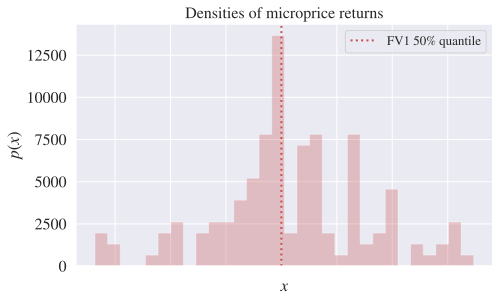

In [89]:
fig, ax = plt.subplots(1, 1)

plt.hist(FB1medianMPChange, color='r', density=True, histtype='stepfilled', alpha=0.3, bins=30)
plt.axvline(x=np.percentile(FB1medianMPChange, 50), c='r',linestyle = 'dotted')
legend = [symbol_choice+" 50% quantile"]
ax.legend(loc='best', frameon=False)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("Densities of microprice returns")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(legend, loc='best')
title= 'DensityMicroPrice'+str(symbol_choice)+'.png'
plt.savefig(os.path.join(graphicsLocation,title))

No handles with labels found to put in legend.


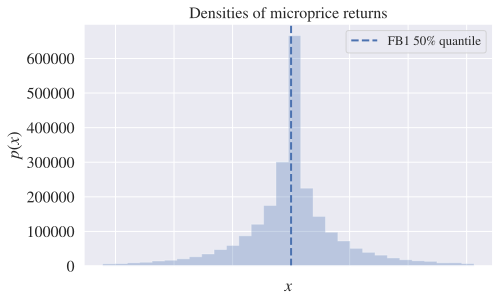

In [90]:
fig, ax = plt.subplots(1, 1)

plt.hist(JB1medianMPChange, color='b', density=True, histtype='stepfilled', alpha=0.3, bins=30)
ax.legend(loc='best', frameon=False)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.axvline(x=np.percentile(JB1medianMPChange, 50), c='b',linestyle = '--')
legend = [symbol_choice_2+" 50% quantile"]
plt.title("Densities of microprice returns")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(legend, loc='best')
title= 'DensityMicroPrice'+str(symbol_choice_2)+'.png'
plt.savefig(os.path.join(graphicsLocation,title))

In [83]:
jb1sample = signal.resample(JB1medianMPChange, 1000)
fb1sample = signal.resample(FB1medianMPChange, 1000)

In [85]:
feat_p, feat_q = shogun_features(fv1sample,jb1sample)

In [86]:
mmd = QuadraticTimeMMD(feat_p, feat_q)
kernel = GaussianKernel(10, 1)
mmd.set_kernel(kernel)
kernel1 = GaussianKernel(10, 0.1)
kernel2 = GaussianKernel(10, 1)
kernel3 = GaussianKernel(10, 10)
kernel4 = GaussianKernel(5, 0.15)
mmd.add_kernel(kernel1)
mmd.add_kernel(kernel2)
mmd.add_kernel(kernel3)
mmd.add_kernel(kernel4)

mmd.set_train_test_mode(True)
mmd.set_train_test_ratio(1)

In [87]:
num_runs = 1
num_folds = 3
alpha = 0.05
mmd.set_kernel_selection_strategy(KSM_CROSS_VALIDATION, num_runs, num_folds, alpha)
mmd.select_kernel()
learnt_kernel_single = GaussianKernel.obtain_from_generic(mmd.get_kernel())
width = learnt_kernel_single.get_width()
print('Print best kernel width is:', width)

mmdutils.SignificanceResultsMMD.compute_the_p_value_unbiased(mmd=mmd)
_, p_value_biased = mmdutils.SignificanceResultsMMD.compute_the_p_value_biased(mmd=mmd)
_, p_value_unbiased = mmdutils.SignificanceResultsMMD.compute_the_p_value_unbiased(mmd=mmd)

mmdutils.SignificanceResultsMMD.test_by_hand(mmd=mmd, p_value=p_value_unbiased, alpha=alpha)
mmdutils.SignificanceResultsMMD.full_two_sample(mmd=mmd, alpha=alpha)



Print best kernel width is: 0.10000000000000002
P-value of MMD value for the unbiased statistic 0.00 is 0.00
P-value of MMD value for the biased statistic 0.00 is 0.00
P-value of MMD value for the unbiased statistic 0.00 is 0.00
Threshold for rejecting H0 with a test power of 0.05 is 0.00
H0 is rejected with confidence 0.05
H0 is rejected with confidence 0.05
P-value of MMD test is 1.00


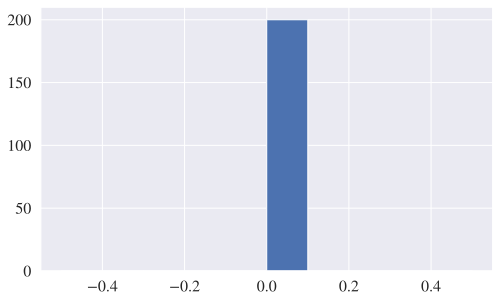

In [92]:
num_runs = 200
p_values = np.zeros(num_runs)

last = time.time()
for i in range(num_runs):
    feats_p, feats_q = shogun_features(fv1sample,jb1sample)
    width=1
    k = GaussianKernel(10, width)

    mmd = QuadraticTimeMMD()
    mmd.set_p(feats_p)
    mmd.set_q(feats_q)
    mmd.set_kernel(k)

    mmd.set_num_null_samples(50)
    stat = mmd.compute_statistic() # would be good if compute_p_value() with no arguments computed the statistic itself
    p_values[i] = mmd.compute_p_value(stat)

# does this look more or less uniform (it has to be)?
plt.hist(p_values);